<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Section 6 </div>
<div style="text-align: right">Fantastic three, Team member: 001305649 Zili Liao 001814656 Yanhong Chen
001088917 Guanyu Zhu
</div>

## DS Final project

<div><b>Background and statement: </b></div>

As we all know, education plays an important role in social development. The better education we have, the more qualified people we have to meet the society needed. So we want to know if education investment will truly help education quality.
In China, we have great demand for high-quality talents, to meet our needs for development in so many areas. The government increases the education budget every year in order to help every student to have a better education. We want to know if the money actually helps our students to get a better education rather than wasting money.


<div><b>Objectives: </b></div>

First,we collect every years’ total education funds of China, and the total amount of graduate students. Then we analyze the trend of both data to make sure if increasing funds will help improve education.
 
After that, We collected the distribution of education funds and graduation rates of every provinces in China from 1998 to 2016. We hope to create a model for predicting future graduation rate, and analyzing how to improve the graduate rate by using better education investment distribution strategy.

Resource: [China statistical yearbook ](http://www.stats.gov.cn/tjsj/ndsj/2019/indexeh.htm) 

In [1]:
#pip install xlrd 

#install xlrd inadvance to extract data from Excel spreadsheets (.xls and .xlsx, versions 2.0 onwards) 
#pip install tensorflow
#!pip install -q git+https://github.com/tensorflow/docs

We build the model by using multiple linear regression from TensorFlow.

In [18]:
#using for store the model
from __future__ import absolute_import, division, print_function, unicode_literals
import os

import numpy as np
import pandas as pd
# prevent scientific notation from large numbers
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import pymc3 as pm
import matplotlib.pyplot as plt
#import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

import math
import tensorflow as tf
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

### 1 Review of recent years:  

In [19]:
Number_of_Graduates_In_China = pd.read_excel('data/Number_of_Graduates_of_Formal_Education_by_Type_and_Level.xls')
Number_of_Graduates_In_China = Number_of_Graduates_In_China.fillna(0)
Number_of_Graduates_In_China.head(5)

,Year,Undergraduate,Academy,Regular_high_school,Secondary_vocational_education,junior_secondary_schools,vocational_junior_secondary_school,primary_schoole,special_education_school,preschool_education_institution
0,1978,16.50,0.80,682.70,40.30,1692.60,0.00,2287.90,0.30,0.00
1,1979,8.50,0.00,726.50,37.40,1657.90,0.00,2087.90,0.30,0.00
2,1980,14.70,0.00,616.20,73.30,964.80,7.90,2053.30,0.40,0.00
3,1981,14.00,14.00,486.10,99.50,1154.20,0.00,2075.70,0.40,0.00
4,1982,45.70,8.90,310.60,124.00,1032.40,0.20,2068.90,0.40,0.00


In [20]:
Number_of_Graduates_In_China= Number_of_Graduates_In_China.set_index('Year')
Number_of_Graduates_In_China.head(5)

,Undergraduate,Academy,Regular_high_school,Secondary_vocational_education,junior_secondary_schools,vocational_junior_secondary_school,primary_schoole,special_education_school,preschool_education_institution
Year,,,,,,,,,
1978,16.50,0.80,682.70,40.30,1692.60,0.00,2287.90,0.30,0.00
1979,8.50,0.00,726.50,37.40,1657.90,0.00,2087.90,0.30,0.00
1980,14.70,0.00,616.20,73.30,964.80,7.90,2053.30,0.40,0.00
1981,14.00,14.00,486.10,99.50,1154.20,0.00,2075.70,0.40,0.00
1982,45.70,8.90,310.60,124.00,1032.40,0.20,2068.90,0.40,0.00


At the beginning we plotted the situation of graduates of different educational levels in China in the past 40 years, and found that the number of high level education students has increased tremendously after 2000.

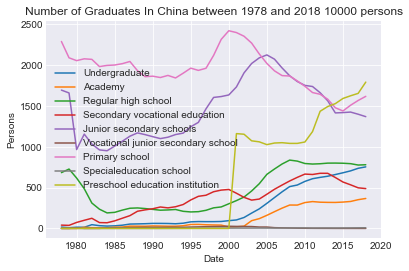

In [21]:
plt.plot(Number_of_Graduates_In_China.Undergraduate, label='Undergraduate')
plt.plot(Number_of_Graduates_In_China.Academy, label='Academy')
plt.plot(Number_of_Graduates_In_China.Regular_high_school, label='Regular high school')
plt.plot(Number_of_Graduates_In_China.Secondary_vocational_education, label='Secondary vocational education')
plt.plot(Number_of_Graduates_In_China.junior_secondary_schools, label='Junior secondary schools')
plt.plot(Number_of_Graduates_In_China.vocational_junior_secondary_school, label='Vocational junior secondary school')
plt.plot(Number_of_Graduates_In_China.primary_schoole, label='Primary school')
plt.plot(Number_of_Graduates_In_China.special_education_school, label='Specialeducation school')
plt.plot(Number_of_Graduates_In_China.preschool_education_institution, label='Preschool education institution')

plt.title('Number of Graduates In China between 1978 and 2018 10000 persons')
plt.ylabel('Persons')
plt.xlabel('Date')
plt.legend() 
plt.grid(True)

In [22]:
Basic_Statistics_on_Educational_Funds_In_China = pd.read_excel('data/Basic_Statistics_on_Educational_Funds.xls')
Basic_Statistics_on_Educational_Funds_In_China = Basic_Statistics_on_Educational_Funds_In_China.fillna(0)
Basic_Statistics_on_Educational_Funds_In_China = Basic_Statistics_on_Educational_Funds_In_China.set_index('Year')
Basic_Statistics_on_Educational_Funds_In_China.tail(2)

,Total,Government appropriation for education,Public expenditure on education,Funds from runners of private school,Donations and fund-rasing for running school,Income from teachingresearch and other auxiliary activity,Other education funds
Year,,,,,,,
2017,42562.01,34207.75,29919.78,225.01,85.00,6957.57,1086.68
2018,46951.10,38324.20,31023.20,254.20,88.10,7120.10,1165.30


Correspondingly, the investment in education has increased year by year in China, and we can basically confirm that the capital investment and the number of graduates are positively correlated.

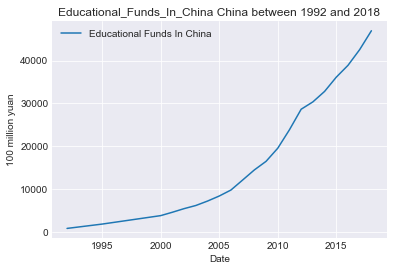

In [23]:
plt.plot(Basic_Statistics_on_Educational_Funds_In_China.Total, label='Educational Funds In China')
plt.title('Educational_Funds_In_China China between 1992 and 2018')
plt.ylabel('100 million yuan')
plt.xlabel('Date')
plt.legend() 
plt.grid(True)

As we have seen above, with the continuous increase in China's education funding in the past three decades, graduates at all levels in China have shown different fluctuations: preschool education has been popularized since 2000, and its graduation rate is growing annually.  

The graduation rate of Junior secondary schools and Primary schools peaked around 2005 and then decreases year by year, showing the impact of the decline in fertility in China.  

The number of undergraduate, academy and regular high school graduates has increased year after year after 2000, showing that China's education level and average education have been greatly improved by the huge investment in education funds and other effects. 

Supervised learning, Linear regression

### 2. Build the model to predict the high school graduation rate.

<h4 style="text-align: right"> Units of expenditures measurement: Thousands Chinese Yuan</h4>
<br>

First of all, we do some data cleaning work.

In [24]:
data = pd.read_excel('data/1998-2016_High-School_Education_Budget_Expenditure_Details.xlsx')
data

,Year,Region,Total,PersonalPart,WagesAndBenefits,SubsidiesfForIndividualsAndFamilies,FinancialAid,CommonPart,CommodityAndServiceExpenses,OtherCapitalExpenditures,SpecialPublicExpenditure,SpecialProjectExpenditure,BasicConstructionExpenditure,Graduates,Entrants,GraduationRate
0,2016,合计,384776304,248424993,188647517,59777476,12360292,129458483,63407910,66050574,18927768,47122805,6892827,6639292,8000548,0.83
1,2016,北京,13698042,7502489,5100886,2401603,31635,5125551,3176334,1949217,1074884,874333,1070002,49685,53755,0.92
2,2016,天津,5684801,4010549,2768808,1241741,28911,1673090,920916,752174,177852,574322,1161,45239,54984,0.82
3,2016,河北,15316288,10235996,7998756,2237240,487908,4942560,2321041,2621519,597954,2023566,137732,376969,457055,0.82
4,2016,山西,9734307,6526811,5380214,1146597,359008,3098877,1770385,1328492,390464,938028,108619,180270,227416,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,1998,陕西,391155,207291,167801,38844,830,147058,80481,429999,796,39381,36805,47709,149162,0.32
604,1998,甘肃,258859,164751,139585,24521,1292,61523,31932,283380,125,16291,32585,33377,94111,0.35
605,1998,青海,87612,54884,40481,12920,1488,20027,10034,100532,127,6138,12700,7560,25885,0.29
606,1998,宁夏,64812,38744,33693,4642,429,20248,8884,69454,109,3973,5820,9740,34964,0.28


In [25]:
data = pd.read_excel('data/1998-2016_High-School_Education_Budget_Expenditure_Details.xlsx')
dataForTotal = data.loc[data['Region'] =="合计"]
dataForTotal = dataForTotal.set_index('Year')
dataForTotal.head(5)

,Region,Total,PersonalPart,WagesAndBenefits,SubsidiesfForIndividualsAndFamilies,FinancialAid,CommonPart,CommodityAndServiceExpenses,OtherCapitalExpenditures,SpecialPublicExpenditure,SpecialProjectExpenditure,BasicConstructionExpenditure,Graduates,Entrants,GraduationRate
Year,,,,,,,,,,,,,,,
2016,合计,384776304,248424993,188647517,59777476,12360292,129458483,63407910,66050574,18927768,47122805,6892827,6639292,8000548,0.83
2015,合计,349909727,216424093,161144439,55279654,10963785,127582607,56186070,71396537,18080513,53316024,5903028,6052308,8029206,0.75
2014,合计,315225442,179179370,131505092,47674279,9068569,130083596,54654823,75428773,16960747,58468026,5962476,5721518,7966066,0.72
2013,合计,307637139,164899937,122453911,42446026,8822886,135844214,56154363,79689851,20002819,59687032,6892988,5497363,7965960,0.69
2012,合计,182649892,116785895,89855249,26930646,7722193,58488864,21943900,36544964,7744866,28800098,7375133,5830376,8226961,0.71


In [26]:
dataForTotal.corr(method='spearman') 

,Total,PersonalPart,WagesAndBenefits,SubsidiesfForIndividualsAndFamilies,FinancialAid,CommonPart,CommodityAndServiceExpenses,OtherCapitalExpenditures,SpecialPublicExpenditure,SpecialProjectExpenditure,BasicConstructionExpenditure,Graduates,Entrants,GraduationRate
Total,1.00,1.00,1.00,1.00,1.00,0.98,0.99,0.59,0.98,0.98,0.23,0.95,0.95,0.80
PersonalPart,1.00,1.00,1.00,1.00,1.00,0.97,0.98,0.59,0.97,0.98,0.24,0.96,0.96,0.81
WagesAndBenefits,1.00,1.00,1.00,1.00,1.00,0.97,0.98,0.59,0.97,0.98,0.24,0.96,0.96,0.81
SubsidiesfForIndividualsAndFamilies,1.00,1.00,1.00,1.00,1.00,0.97,0.98,0.59,0.97,0.98,0.24,0.96,0.96,0.81
FinancialAid,1.00,1.00,1.00,1.00,1.00,0.97,0.98,0.59,0.97,0.98,0.24,0.96,0.96,0.81
CommonPart,0.98,0.97,0.97,0.97,0.97,1.00,0.98,0.60,0.99,0.99,0.21,0.91,0.90,0.75
CommodityAndServiceExpenses,0.99,0.98,0.98,0.98,0.98,0.98,1.00,0.57,0.99,0.97,0.19,0.92,0.91,0.75
OtherCapitalExpenditures,0.59,0.59,0.59,0.59,0.59,0.60,0.57,1.00,0.58,0.61,0.32,0.43,0.52,0.36
SpecialPublicExpenditure,0.98,0.97,0.97,0.97,0.97,0.99,0.99,0.58,1.00,0.97,0.19,0.91,0.90,0.72
SpecialProjectExpenditure,0.98,0.98,0.98,0.98,0.98,0.99,0.97,0.61,0.97,1.00,0.24,0.94,0.95,0.77


Look at the overall statistics, Pandas dataframe.corr( ) is used to find the pairwise correlation of all columns in the dataframe. the Education budget expenditure and Graduation Rate have correlation > 75, so we can say when the Total Education budget expenditure goes up will driving the Graduation rate up.

In [27]:
data = data[~data['Region'].isin(["合计"])]
data = data.sort_values(by=['Year'])
data.head(5)

,Year,Region,Total,PersonalPart,WagesAndBenefits,SubsidiesfForIndividualsAndFamilies,FinancialAid,CommonPart,CommodityAndServiceExpenses,OtherCapitalExpenditures,SpecialPublicExpenditure,SpecialProjectExpenditure,BasicConstructionExpenditure,Graduates,Entrants,GraduationRate
607,1998,新疆,276636,189584,156497,30775,2561,75423,32458,307411,633,21380,11629,11745,38549,0.30
577,1998,北京,723803,383396,303298,76553,3544,329019,89061,800356,851,150479,11387,6136,9473,0.65
578,1998,天津,524905,246239,183594,61322,1322,246687,54861,586227,496,121885,31979,5413,11060,0.49
579,1998,河北,1120764,482707,386679,89960,6365,470601,184135,1210724,3098,168912,167457,7927,23885,0.33
580,1998,山西,395390,197913,164103,32917,1519,171841,64377,428307,1232,68716,25637,75812,205738,0.37


We have plotted the total number of graduate students in each province. Please note that Guangdong has the largest number of graduate students and Beijing has the least

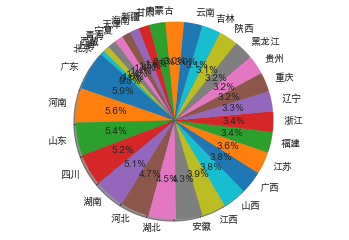

In [28]:
Entrants = data.groupby(['Region'])['Entrants'].sum().sort_values(ascending=False)
region = Entrants.keys()
students = Entrants.values
labels = region
sizes = students
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

Calculate the avrage graduation rate of past two decades. Beijing, Shanghai and Zhejiang province have higher graduation rates

Region
北京   0.86
上海   0.83
浙江   0.79
Name: GraduationRate, dtype: float64


(0.5, 0.9)

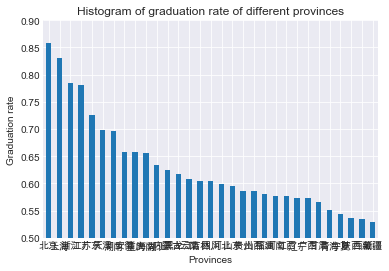

In [29]:
dataGroupByRegion = data.groupby(['Region'])['GraduationRate'].mean().sort_values(ascending=False)
print(dataGroupByRegion.head(3))
dataGroupByRegion.plot.bar(x='lab', y='val', rot=0)
plt.title('Histogram of graduation rate of different provinces')
plt.xlabel('Provinces')
plt.ylabel('Graduation rate')
plt.ylim(0.5,0.9)

In [30]:
column_names = ['Year','Region','Total','PersonalPart','WagesAndBenefits','SubsidiesfForIndividualsAndFamilies',
                'FinancialAid','CommonPart','CommodityAndServiceExpenses','OtherCapitalExpenditures',
                'SpecialPublicExpenditure','SpecialProjectExpenditure','BasicConstructionExpenditure',
                'Graduates','Entrants','GraduationRate']

We delete the year and region parts of the data set, and calculate the proportion of each different investment in total annual education investment of each province. As to predict the model we focus more on the way of investment rather than the amount of investment. 

And we divide the number of students each year by the average number of students, to highlight the difference in the number of students in different regions, but it will not cause difficulties in building models due to different orders of magnitude.

In [31]:
data = data.drop(['PersonalPart','CommonPart'], axis=1)
dataByPercentage = data.copy()
dataFundByPercentage = data.copy()

dataFundByPercentage = dataFundByPercentage[['WagesAndBenefits','SubsidiesfForIndividualsAndFamilies',
                'FinancialAid','CommodityAndServiceExpenses','OtherCapitalExpenditures',
                'SpecialPublicExpenditure','SpecialProjectExpenditure',
                'BasicConstructionExpenditure']].div(dataByPercentage.Total,axis=0)

studentsNumbers = data.copy()
averageGraduatesNumbers = data['Graduates'].mean()
averageEntrantsNumbers = data['Entrants'].mean()
graduatesNumbers = studentsNumbers[['Graduates']].div(averageGraduatesNumbers,axis=0)
entrantsNumbers = studentsNumbers[['Entrants']].div(averageEntrantsNumbers,axis=0)

dataByPercentage = dataFundByPercentage.copy()
dataByPercentage['GraduationRate'] = data['GraduationRate']
dataByPercentage['Graduates'] = graduatesNumbers
dataByPercentage['Entrants'] = entrantsNumbers
dataByPercentage

,WagesAndBenefits,SubsidiesfForIndividualsAndFamilies,FinancialAid,CommodityAndServiceExpenses,OtherCapitalExpenditures,SpecialPublicExpenditure,SpecialProjectExpenditure,BasicConstructionExpenditure,GraduationRate,Graduates,Entrants
607,0.57,0.11,0.01,0.12,1.11,0.00,0.08,0.04,0.30,0.09,0.19
577,0.42,0.11,0.00,0.12,1.11,0.00,0.21,0.02,0.65,0.05,0.05
578,0.35,0.12,0.00,0.10,1.12,0.00,0.23,0.06,0.49,0.04,0.05
579,0.35,0.08,0.01,0.16,1.08,0.00,0.15,0.15,0.33,0.06,0.12
580,0.42,0.08,0.00,0.16,1.08,0.00,0.17,0.06,0.37,0.58,1.01
...,...,...,...,...,...,...,...,...,...,...,...
29,0.50,0.16,0.04,0.12,0.16,0.03,0.13,0.06,0.74,0.24,0.21
30,0.51,0.16,0.05,0.12,0.16,0.05,0.11,0.04,0.71,0.30,0.24
31,0.53,0.16,0.06,0.13,0.13,0.04,0.09,0.05,0.72,1.24,0.97
16,0.42,0.14,0.04,0.23,0.19,0.05,0.13,0.02,0.88,4.76,3.49


Normalize the data, to reduce the difference of ranges of each feature in our data

In [32]:
def norm(x):
    mean = np.mean(x)
    std = np.std(x)
    x = (x - mean)/std
    return x

Split the data into training dataset and testing dataset. 

In [33]:
train_dataset = norm(dataByPercentage.sample(frac=0.8,random_state=0))
test_dataset = norm(dataByPercentage.drop(train_dataset.index))
print('shape of train_dataset:',train_dataset.shape)
print('shape of test_dataset:',test_dataset.shape)
train_dataset.GraduationRate = data.GraduationRate
test_dataset.GraduationRate = data.GraduationRate

shape of train_dataset: (471, 11)
shape of test_dataset: (118, 11)


In [34]:
test_dataset.head(3)

,WagesAndBenefits,SubsidiesfForIndividualsAndFamilies,FinancialAid,CommodityAndServiceExpenses,OtherCapitalExpenditures,SpecialPublicExpenditure,SpecialProjectExpenditure,BasicConstructionExpenditure,GraduationRate,Graduates,Entrants
585,-2.11,-1.00,-0.62,-1.80,1.59,-1.29,0.56,2.92,0.66,-1.10,-1.33
587,-1.73,-1.25,-0.70,-0.91,1.56,-1.18,-0.04,2.36,0.61,-0.22,-0.20
591,-1.40,-1.31,-0.68,0.08,1.56,-1.25,-0.70,2.26,0.39,-0.91,-0.81


Separate the target value GraduationRate which is the value that our model wants to predict.

In [35]:
train_dataset_copy = train_dataset.copy()
test_dataset_copy = test_dataset.copy()
# train_target is all the numbers of graduates from training data
train_target = train_dataset_copy.pop("GraduationRate")
# test_target is all the numbers of graduates from testing data
test_target = test_dataset_copy.pop("GraduationRate")
train_data = train_dataset_copy.copy()
test_data = test_dataset_copy.copy()

In [36]:
train_target.head(3)

355   0.58
590   0.42
543   0.47
Name: GraduationRate, dtype: float64

In [37]:
train_data.head(3)

,WagesAndBenefits,SubsidiesfForIndividualsAndFamilies,FinancialAid,CommodityAndServiceExpenses,OtherCapitalExpenditures,SpecialPublicExpenditure,SpecialProjectExpenditure,BasicConstructionExpenditure,Graduates,Entrants
355,-1.16,-0.92,-0.64,-0.07,1.62,0.58,0.15,1.15,0.16,0.37
590,0.14,-1.04,-0.64,-0.72,1.61,-1.15,-0.03,0.93,-0.66,-0.35
543,1.68,0.70,-0.54,-0.93,-0.86,-1.32,-0.64,-0.26,-1.00,-1.03


In [38]:
test_data[:3]

,WagesAndBenefits,SubsidiesfForIndividualsAndFamilies,FinancialAid,CommodityAndServiceExpenses,OtherCapitalExpenditures,SpecialPublicExpenditure,SpecialProjectExpenditure,BasicConstructionExpenditure,Graduates,Entrants
585,-2.11,-1.00,-0.62,-1.80,1.59,-1.29,0.56,2.92,-1.10,-1.33
587,-1.73,-1.25,-0.70,-0.91,1.56,-1.18,-0.04,2.36,-0.22,-0.20
591,-1.40,-1.31,-0.68,0.08,1.56,-1.25,-0.70,2.26,-0.91,-0.81


In [39]:
test_target[:3]

585   0.66
587   0.61
591   0.39
Name: GraduationRate, dtype: float64

In [40]:
train_stats = train_data.describe()
train_stats = train_stats.transpose()
train_stats.head(10)

,count,mean,std,min,25%,50%,75%,max
WagesAndBenefits,471.00,-0.00,1.00,-2.99,-0.62,-0.04,0.58,3.57
SubsidiesfForIndividualsAndFamilies,471.00,0.00,1.00,-2.19,-0.75,-0.13,0.52,4.92
FinancialAid,471.00,-0.00,1.00,-0.73,-0.60,-0.40,0.28,6.35
CommodityAndServiceExpenses,471.00,-0.00,1.00,-2.25,-0.76,-0.02,0.66,3.47
OtherCapitalExpenditures,471.00,0.00,1.00,-1.01,-0.68,-0.53,1.53,1.84
SpecialPublicExpenditure,471.00,-0.00,1.00,-1.35,-1.07,0.08,0.57,6.43
SpecialProjectExpenditure,471.00,-0.00,1.00,-1.51,-0.39,-0.10,0.21,17.83
BasicConstructionExpenditure,471.00,0.00,1.00,-1.09,-0.79,-0.28,0.58,5.59
Graduates,471.00,-0.00,1.00,-1.29,-0.74,-0.23,0.45,5.07
Entrants,471.00,0.00,1.00,-1.47,-0.69,-0.12,0.60,4.07


In [41]:
normed_train_data = train_data
normed_test_data = test_data

In [42]:
train_target = train_target.squeeze()
test_target = test_target.squeeze()

In [43]:
normed_train_data

,WagesAndBenefits,SubsidiesfForIndividualsAndFamilies,FinancialAid,CommodityAndServiceExpenses,OtherCapitalExpenditures,SpecialPublicExpenditure,SpecialProjectExpenditure,BasicConstructionExpenditure,Graduates,Entrants
355,-1.16,-0.92,-0.64,-0.07,1.62,0.58,0.15,1.15,0.16,0.37
590,0.14,-1.04,-0.64,-0.72,1.61,-1.15,-0.03,0.93,-0.66,-0.35
543,1.68,0.70,-0.54,-0.93,-0.86,-1.32,-0.64,-0.26,-1.00,-1.03
175,-0.02,-0.55,-0.11,0.36,-0.29,0.31,1.16,-0.97,1.36,1.20
451,-1.11,-0.89,-0.65,0.15,-0.73,-1.25,-0.26,1.23,0.11,0.29
...,...,...,...,...,...,...,...,...,...,...
249,1.59,0.51,0.09,0.13,-0.66,0.10,-0.40,-0.77,0.45,0.40
354,-0.26,1.06,-0.65,-0.98,1.84,-0.42,-0.11,-0.41,-0.40,-0.63
492,-0.48,-0.33,-0.63,-0.69,1.69,-1.18,-0.45,1.24,0.45,0.43
579,-1.34,-0.90,-0.55,0.10,1.62,-1.28,0.12,1.26,-1.24,-1.36


We using 3 hidden layers with 128 units each:
Optimize our basic model for preventing overfitting by using L1 regularization, where the cost added is proportional to the absolute value of the weights coefficients

In [44]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001), input_shape=[len(train_data.keys())]),
    layers.Dense(128, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(128, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])
  
  return model

In [45]:
model = build_model()

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                704       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 25,665
Trainable params: 25,665
Non-trainable params: 0
_________________________________________________________________


We glance at the predictions based on this model and we can see that there are still too many errors

In [47]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.26127857],
       [-0.34856576],
       [-0.15571864],
       [ 0.21254806],
       [-0.02332622],
       [-0.01910457],
       [-0.3328517 ],
       [-0.01711455],
       [-0.2100758 ],
       [-0.06415121]], dtype=float32)

We start training the model for 500 epochs, and save the weights and bias for the use of the model later

In [48]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 period=5,
                                                 verbose=1)
# Train the model with the new callback
history = model.fit(normed_train_data, 
          train_target,  
          epochs=500,
          validation_data=(normed_test_data, test_target),
          callbacks=[cp_callback])  # train by the callback

Train on 471 samples, validate on 118 samples
Epoch 1/500
471/471 [==============================] - 1s 1ms/sample - loss: 0.3886 - mae: 0.2875 - mse: 0.1629 - val_loss: 0.2532 - val_mae: 0.1377 - val_mse: 0.0301
Epoch 2/500
471/471 [==============================] - 0s 63us/sample - loss: 0.2483 - mae: 0.1321 - mse: 0.0277 - val_loss: 0.2438 - val_mae: 0.1290 - val_mse: 0.0264
Epoch 3/500
471/471 [==============================] - 0s 68us/sample - loss: 0.2354 - mae: 0.1111 - mse: 0.0211 - val_loss: 0.2677 - val_mae: 0.1728 - val_mse: 0.0574
Epoch 4/500
471/471 [==============================] - 0s 75us/sample - loss: 0.2403 - mae: 0.1382 - mse: 0.0330 - val_loss: 0.2248 - val_mae: 0.1171 - val_mse: 0.0211
Epoch 5/500
 32/471 [=>............................] - ETA: 0s - loss: 0.2164 - mae: 0.0850 - mse: 0.0127
Epoch 00005: saving model to training_1/cp.ckpt
471/471 [==============================] - 0s 101us/sample - loss: 0.2287 - mae: 0.1186 - mse: 0.0285 - val_loss: 0.2110 - val_ma

Epoch 42/500
471/471 [==============================] - 0s 74us/sample - loss: 0.0185 - mae: 0.0566 - mse: 0.0061 - val_loss: 0.0167 - val_mae: 0.0526 - val_mse: 0.0047
Epoch 43/500
471/471 [==============================] - 0s 64us/sample - loss: 0.0171 - mae: 0.0533 - mse: 0.0053 - val_loss: 0.0193 - val_mae: 0.0684 - val_mse: 0.0078
Epoch 44/500
471/471 [==============================] - 0s 62us/sample - loss: 0.0165 - mae: 0.0529 - mse: 0.0053 - val_loss: 0.0158 - val_mae: 0.0540 - val_mse: 0.0049
Epoch 45/500
 32/471 [=>............................] - ETA: 0s - loss: 0.0159 - mae: 0.0557 - mse: 0.0050
Epoch 00045: saving model to training_1/cp.ckpt
471/471 [==============================] - 0s 76us/sample - loss: 0.0156 - mae: 0.0508 - mse: 0.0050 - val_loss: 0.0152 - val_mae: 0.0515 - val_mse: 0.0048
Epoch 46/500
471/471 [==============================] - 0s 63us/sample - loss: 0.0154 - mae: 0.0539 - mse: 0.0053 - val_loss: 0.0138 - val_mae: 0.0460 - val_mse: 0.0039
Epoch 47/500


Epoch 84/500
471/471 [==============================] - 0s 70us/sample - loss: 0.0085 - mae: 0.0471 - mse: 0.0044 - val_loss: 0.0084 - val_mae: 0.0483 - val_mse: 0.0043
Epoch 85/500
 32/471 [=>............................] - ETA: 0s - loss: 0.0098 - mae: 0.0564 - mse: 0.0057
Epoch 00085: saving model to training_1/cp.ckpt
471/471 [==============================] - 0s 88us/sample - loss: 0.0085 - mae: 0.0483 - mse: 0.0044 - val_loss: 0.0081 - val_mae: 0.0450 - val_mse: 0.0041
Epoch 86/500
471/471 [==============================] - 0s 68us/sample - loss: 0.0086 - mae: 0.0472 - mse: 0.0045 - val_loss: 0.0075 - val_mae: 0.0444 - val_mse: 0.0035
Epoch 87/500
471/471 [==============================] - 0s 63us/sample - loss: 0.0083 - mae: 0.0468 - mse: 0.0044 - val_loss: 0.0083 - val_mae: 0.0474 - val_mse: 0.0043
Epoch 88/500
471/471 [==============================] - 0s 72us/sample - loss: 0.0085 - mae: 0.0485 - mse: 0.0046 - val_loss: 0.0079 - val_mae: 0.0477 - val_mse: 0.0039
Epoch 89/500


 32/471 [=>............................] - ETA: 0s - loss: 0.0055 - mae: 0.0358 - mse: 0.0024
Epoch 00125: saving model to training_1/cp.ckpt
471/471 [==============================] - 0s 96us/sample - loss: 0.0073 - mae: 0.0453 - mse: 0.0042 - val_loss: 0.0068 - val_mae: 0.0437 - val_mse: 0.0037
Epoch 126/500
471/471 [==============================] - 0s 72us/sample - loss: 0.0072 - mae: 0.0459 - mse: 0.0041 - val_loss: 0.0073 - val_mae: 0.0528 - val_mse: 0.0043
Epoch 127/500
471/471 [==============================] - 0s 67us/sample - loss: 0.0072 - mae: 0.0445 - mse: 0.0041 - val_loss: 0.0097 - val_mae: 0.0603 - val_mse: 0.0066
Epoch 128/500
471/471 [==============================] - 0s 66us/sample - loss: 0.0072 - mae: 0.0454 - mse: 0.0041 - val_loss: 0.0075 - val_mae: 0.0459 - val_mse: 0.0044
Epoch 129/500
471/471 [==============================] - 0s 67us/sample - loss: 0.0071 - mae: 0.0452 - mse: 0.0040 - val_loss: 0.0084 - val_mae: 0.0559 - val_mse: 0.0053
Epoch 130/500
 32/471 

Epoch 166/500
471/471 [==============================] - 0s 76us/sample - loss: 0.0067 - mae: 0.0449 - mse: 0.0040 - val_loss: 0.0062 - val_mae: 0.0415 - val_mse: 0.0035
Epoch 167/500
471/471 [==============================] - 0s 69us/sample - loss: 0.0066 - mae: 0.0439 - mse: 0.0039 - val_loss: 0.0073 - val_mae: 0.0499 - val_mse: 0.0046
Epoch 168/500
471/471 [==============================] - 0s 70us/sample - loss: 0.0067 - mae: 0.0449 - mse: 0.0040 - val_loss: 0.0061 - val_mae: 0.0417 - val_mse: 0.0034
Epoch 169/500
471/471 [==============================] - 0s 70us/sample - loss: 0.0067 - mae: 0.0431 - mse: 0.0040 - val_loss: 0.0062 - val_mae: 0.0421 - val_mse: 0.0035
Epoch 170/500
 32/471 [=>............................] - ETA: 0s - loss: 0.0067 - mae: 0.0491 - mse: 0.0040
Epoch 00170: saving model to training_1/cp.ckpt
471/471 [==============================] - 0s 86us/sample - loss: 0.0065 - mae: 0.0433 - mse: 0.0039 - val_loss: 0.0065 - val_mae: 0.0430 - val_mse: 0.0038
Epoch 17

471/471 [==============================] - 0s 63us/sample - loss: 0.0066 - mae: 0.0455 - mse: 0.0041 - val_loss: 0.0056 - val_mae: 0.0384 - val_mse: 0.0032
Epoch 208/500
471/471 [==============================] - 0s 65us/sample - loss: 0.0062 - mae: 0.0421 - mse: 0.0038 - val_loss: 0.0062 - val_mae: 0.0455 - val_mse: 0.0037
Epoch 209/500
471/471 [==============================] - 0s 66us/sample - loss: 0.0062 - mae: 0.0434 - mse: 0.0037 - val_loss: 0.0060 - val_mae: 0.0461 - val_mse: 0.0036
Epoch 210/500
 32/471 [=>............................] - ETA: 0s - loss: 0.0055 - mae: 0.0401 - mse: 0.0031
Epoch 00210: saving model to training_1/cp.ckpt
471/471 [==============================] - 0s 84us/sample - loss: 0.0062 - mae: 0.0422 - mse: 0.0037 - val_loss: 0.0066 - val_mae: 0.0475 - val_mse: 0.0042
Epoch 211/500
471/471 [==============================] - 0s 66us/sample - loss: 0.0065 - mae: 0.0460 - mse: 0.0040 - val_loss: 0.0056 - val_mae: 0.0374 - val_mse: 0.0032
Epoch 212/500
471/471 

471/471 [==============================] - 0s 64us/sample - loss: 0.0059 - mae: 0.0420 - mse: 0.0036 - val_loss: 0.0058 - val_mae: 0.0430 - val_mse: 0.0035
Epoch 249/500
471/471 [==============================] - 0s 64us/sample - loss: 0.0060 - mae: 0.0436 - mse: 0.0037 - val_loss: 0.0057 - val_mae: 0.0431 - val_mse: 0.0033
Epoch 250/500
 32/471 [=>............................] - ETA: 0s - loss: 0.0069 - mae: 0.0444 - mse: 0.0045
Epoch 00250: saving model to training_1/cp.ckpt
471/471 [==============================] - 0s 82us/sample - loss: 0.0058 - mae: 0.0415 - mse: 0.0035 - val_loss: 0.0072 - val_mae: 0.0551 - val_mse: 0.0049
Epoch 251/500
471/471 [==============================] - 0s 72us/sample - loss: 0.0061 - mae: 0.0443 - mse: 0.0038 - val_loss: 0.0058 - val_mae: 0.0416 - val_mse: 0.0035
Epoch 252/500
471/471 [==============================] - 0s 68us/sample - loss: 0.0058 - mae: 0.0411 - mse: 0.0035 - val_loss: 0.0053 - val_mae: 0.0373 - val_mse: 0.0029
Epoch 253/500
471/471 

471/471 [==============================] - 0s 66us/sample - loss: 0.0056 - mae: 0.0404 - mse: 0.0033 - val_loss: 0.0064 - val_mae: 0.0472 - val_mse: 0.0041
Epoch 290/500
 32/471 [=>............................] - ETA: 0s - loss: 0.0077 - mae: 0.0510 - mse: 0.0054
Epoch 00290: saving model to training_1/cp.ckpt
471/471 [==============================] - 0s 88us/sample - loss: 0.0059 - mae: 0.0432 - mse: 0.0036 - val_loss: 0.0061 - val_mae: 0.0425 - val_mse: 0.0038
Epoch 291/500
471/471 [==============================] - 0s 70us/sample - loss: 0.0057 - mae: 0.0390 - mse: 0.0034 - val_loss: 0.0058 - val_mae: 0.0420 - val_mse: 0.0035
Epoch 292/500
471/471 [==============================] - 0s 66us/sample - loss: 0.0059 - mae: 0.0425 - mse: 0.0036 - val_loss: 0.0080 - val_mae: 0.0586 - val_mse: 0.0057
Epoch 293/500
471/471 [==============================] - 0s 70us/sample - loss: 0.0057 - mae: 0.0396 - mse: 0.0034 - val_loss: 0.0066 - val_mae: 0.0476 - val_mse: 0.0044
Epoch 294/500
471/471 

 32/471 [=>............................] - ETA: 0s - loss: 0.0063 - mae: 0.0392 - mse: 0.0041
Epoch 00330: saving model to training_1/cp.ckpt
471/471 [==============================] - 0s 90us/sample - loss: 0.0058 - mae: 0.0423 - mse: 0.0036 - val_loss: 0.0059 - val_mae: 0.0418 - val_mse: 0.0037
Epoch 331/500
471/471 [==============================] - 0s 70us/sample - loss: 0.0056 - mae: 0.0407 - mse: 0.0034 - val_loss: 0.0055 - val_mae: 0.0417 - val_mse: 0.0033
Epoch 332/500
471/471 [==============================] - 0s 67us/sample - loss: 0.0057 - mae: 0.0410 - mse: 0.0035 - val_loss: 0.0055 - val_mae: 0.0413 - val_mse: 0.0033
Epoch 333/500
471/471 [==============================] - 0s 57us/sample - loss: 0.0060 - mae: 0.0434 - mse: 0.0037 - val_loss: 0.0055 - val_mae: 0.0435 - val_mse: 0.0033
Epoch 334/500
471/471 [==============================] - 0s 68us/sample - loss: 0.0055 - mae: 0.0392 - mse: 0.0033 - val_loss: 0.0062 - val_mae: 0.0463 - val_mse: 0.0040
Epoch 335/500
 32/471 

Epoch 371/500
471/471 [==============================] - 0s 70us/sample - loss: 0.0056 - mae: 0.0407 - mse: 0.0034 - val_loss: 0.0053 - val_mae: 0.0398 - val_mse: 0.0031
Epoch 372/500
471/471 [==============================] - 0s 69us/sample - loss: 0.0054 - mae: 0.0390 - mse: 0.0032 - val_loss: 0.0058 - val_mae: 0.0481 - val_mse: 0.0036
Epoch 373/500
471/471 [==============================] - 0s 71us/sample - loss: 0.0057 - mae: 0.0422 - mse: 0.0035 - val_loss: 0.0060 - val_mae: 0.0440 - val_mse: 0.0038
Epoch 374/500
471/471 [==============================] - 0s 71us/sample - loss: 0.0055 - mae: 0.0399 - mse: 0.0033 - val_loss: 0.0055 - val_mae: 0.0411 - val_mse: 0.0033
Epoch 375/500
 32/471 [=>............................] - ETA: 0s - loss: 0.0064 - mae: 0.0499 - mse: 0.0042
Epoch 00375: saving model to training_1/cp.ckpt
471/471 [==============================] - 0s 85us/sample - loss: 0.0056 - mae: 0.0390 - mse: 0.0034 - val_loss: 0.0063 - val_mae: 0.0508 - val_mse: 0.0041
Epoch 37

471/471 [==============================] - 0s 72us/sample - loss: 0.0055 - mae: 0.0411 - mse: 0.0034 - val_loss: 0.0051 - val_mae: 0.0344 - val_mse: 0.0029
Epoch 413/500
471/471 [==============================] - 0s 72us/sample - loss: 0.0054 - mae: 0.0386 - mse: 0.0032 - val_loss: 0.0047 - val_mae: 0.0332 - val_mse: 0.0025
Epoch 414/500
471/471 [==============================] - 0s 71us/sample - loss: 0.0055 - mae: 0.0419 - mse: 0.0034 - val_loss: 0.0069 - val_mae: 0.0531 - val_mse: 0.0047
Epoch 415/500
 32/471 [=>............................] - ETA: 0s - loss: 0.0073 - mae: 0.0577 - mse: 0.0052
Epoch 00415: saving model to training_1/cp.ckpt
471/471 [==============================] - 0s 87us/sample - loss: 0.0057 - mae: 0.0427 - mse: 0.0035 - val_loss: 0.0055 - val_mae: 0.0464 - val_mse: 0.0034
Epoch 416/500
471/471 [==============================] - 0s 61us/sample - loss: 0.0052 - mae: 0.0381 - mse: 0.0030 - val_loss: 0.0055 - val_mae: 0.0406 - val_mse: 0.0033
Epoch 417/500
471/471 

471/471 [==============================] - 0s 67us/sample - loss: 0.0056 - mae: 0.0417 - mse: 0.0034 - val_loss: 0.0050 - val_mae: 0.0418 - val_mse: 0.0028
Epoch 454/500
471/471 [==============================] - 0s 68us/sample - loss: 0.0053 - mae: 0.0392 - mse: 0.0031 - val_loss: 0.0052 - val_mae: 0.0356 - val_mse: 0.0031
Epoch 455/500
 32/471 [=>............................] - ETA: 0s - loss: 0.0053 - mae: 0.0404 - mse: 0.0032
Epoch 00455: saving model to training_1/cp.ckpt
471/471 [==============================] - 0s 79us/sample - loss: 0.0053 - mae: 0.0392 - mse: 0.0031 - val_loss: 0.0045 - val_mae: 0.0319 - val_mse: 0.0023
Epoch 456/500
471/471 [==============================] - 0s 67us/sample - loss: 0.0052 - mae: 0.0379 - mse: 0.0031 - val_loss: 0.0069 - val_mae: 0.0495 - val_mse: 0.0047
Epoch 457/500
471/471 [==============================] - 0s 64us/sample - loss: 0.0054 - mae: 0.0399 - mse: 0.0033 - val_loss: 0.0055 - val_mae: 0.0397 - val_mse: 0.0033
Epoch 458/500
471/471 

471/471 [==============================] - 0s 67us/sample - loss: 0.0052 - mae: 0.0390 - mse: 0.0031 - val_loss: 0.0048 - val_mae: 0.0376 - val_mse: 0.0026
Epoch 495/500
 32/471 [=>............................] - ETA: 0s - loss: 0.0054 - mae: 0.0375 - mse: 0.0032
Epoch 00495: saving model to training_1/cp.ckpt
471/471 [==============================] - 0s 84us/sample - loss: 0.0051 - mae: 0.0374 - mse: 0.0030 - val_loss: 0.0058 - val_mae: 0.0422 - val_mse: 0.0036
Epoch 496/500
471/471 [==============================] - 0s 67us/sample - loss: 0.0055 - mae: 0.0419 - mse: 0.0033 - val_loss: 0.0066 - val_mae: 0.0493 - val_mse: 0.0044
Epoch 497/500
471/471 [==============================] - 0s 60us/sample - loss: 0.0051 - mae: 0.0383 - mse: 0.0030 - val_loss: 0.0053 - val_mae: 0.0377 - val_mse: 0.0032
Epoch 498/500
471/471 [==============================] - 0s 67us/sample - loss: 0.0053 - mae: 0.0391 - mse: 0.0031 - val_loss: 0.0061 - val_mae: 0.0450 - val_mse: 0.0039
Epoch 499/500
471/471 

EPOCHS = 1000

history = model.fit(normed_train_data, train_target, epochs=EPOCHS, 
                    validation_split = 0.2, verbose=0,
                    callbacks=[tfdocs.modeling.EpochDots()])

In [49]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

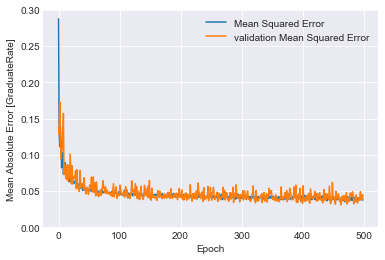

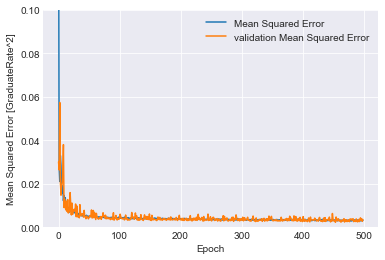

In [50]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Absolute Error [GraduateRate]')
  plt.plot(hist['epoch'], hist['mae'], label='Mean Squared Error')
  plt.plot(hist['epoch'], hist['val_mae'], label = 'validation Mean Squared Error')
  plt.ylim([0,0.3])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Squared Error [GraduateRate^2]')
  plt.plot(hist['epoch'], hist['mse'], label='Mean Squared Error')
  plt.plot(hist['epoch'], hist['val_mse'], label = 'validation Mean Squared Error')
  plt.ylim([0,0.1])
  plt.legend()
  plt.show()


plot_history(history)

As shown in the figure above, when our training is performed about 30 times, the error stabilizes at 0.05, and then tends to be flat

In [51]:
from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train = model.predict(normed_train_data)
print(np.sqrt(mean_squared_error(train_target,pred_train)))

pred = model.predict(normed_test_data)
print(np.sqrt(mean_squared_error(test_target,pred)))

0.05718418154787021
0.05955596512877021


we calculate the mean_squared_error for each traning data and test data using this model. It shows a slight error.

In [52]:
model = build_model()
EPOCHS = 500
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

early_history = model.fit(normed_train_data, train_target, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])

checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)



Epoch: 0, loss:0.4198,  mae:0.3218,  mse:0.1893,  val_loss:0.3383,  val_mae:0.2235,  val_mse:0.1095,  
....................................................................................................
Epoch: 100, loss:0.0080,  mae:0.0465,  mse:0.0042,  val_loss:0.0096,  val_mae:0.0558,  val_mse:0.0059,  
..............................................................................

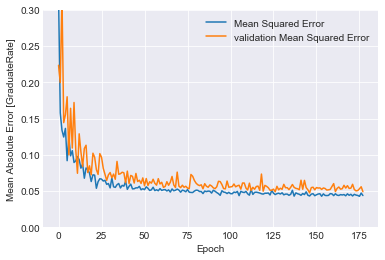

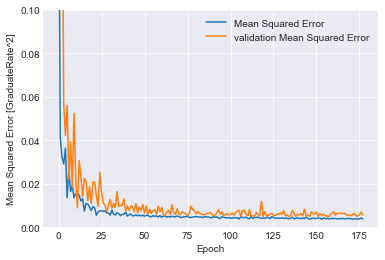

In [53]:
plot_history(early_history)

We update the model.fit call to automatically stop training when the validation score doesn't improve for preventing overfitting. After 40 epoch, the error tends to be flat

The graph shows that on the testing dataset, the average error is usually around +/- 0.05.

In [54]:
loss, mae, mse = model.evaluate(normed_test_data, test_target, verbose=0)
print("Testing set Mean Abs Error: {:5.2f} ".format(mae))

Testing set Mean Abs Error:  0.04 


We ploted the test predictions, and the result shows a very obvious linear distribution

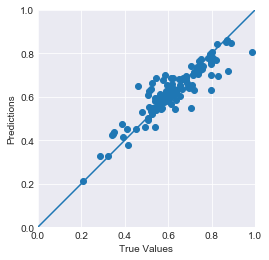

In [55]:
test_predictions = model.predict(normed_test_data).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_target, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

We plotted the prediction error distribution, it looks like a normal distribution, the maximum frequency error is located at 0.02, I think this model is still very accurate.

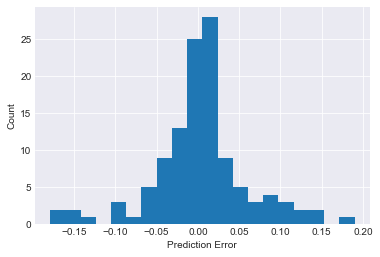

In [56]:
error = test_predictions - test_target
plt.hist(error, bins = 20)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

In [57]:
a = train_target[10]
a 

0.9142361232527902

In [58]:
a = normed_train_data.loc[ 10, : ].values
# add a dimension to a NumPy array,
a = np.expand_dims(a, axis=0)
a

array([[ 1.67379324,  0.86549348, -0.34742384, -0.88335933, -0.53982662,
        -0.26402301,  0.26315342, -1.04403403,  1.63446363,  0.87408564]])

In [59]:
predictions = model.predict(a)
predictions

array([[0.92871284]], dtype=float32)

We found data for one of the provinces, and our predicted graduation rate is very close to the actual graduation rate

In [60]:
def Prediction_accuracy():
    qualified = 0
    total = len(normed_test_data.index)
    predictionOutcome = model.predict(normed_test_data).flatten()
    trueOucome = test_target.values
    for i in range(total):
        lowerRange = trueOucome[i] - 0.1
        upperRange = trueOucome[i] + 0.1
        if lowerRange < predictionOutcome[i] and predictionOutcome[i] < upperRange:
            qualified +=1
    accuracy = qualified/total
    print(accuracy) 
Prediction_accuracy()

0.8898305084745762


We wrote a method, set a small deviation range to count the total accuracy, we can see that the accuracy is very high

In [61]:
model.load_weights(checkpoint_path)
loss, mae, mse = model.evaluate(normed_test_data,  test_target, verbose=2)
print("Testing set Mean Abs Error: {:5.2f}".format(mae))

118/118 - 0s - loss: 0.0057 - mae: 0.0446 - mse: 0.0035
Testing set Mean Abs Error:  0.04


### 3. Analysis using our model.

we use our model to do some analysis based on the data

In [62]:
data = pd.read_excel('data/1998-2016_High-School_Education_Budget_Expenditure_Details.xlsx')
data = data.drop(['PersonalPart','CommonPart'], axis=1)

In [63]:
graduationRateGroupByRegion = data.groupby(['Region'])['GraduationRate'].mean().sort_values(ascending=False)
graduatioRank = graduationRateGroupByRegion.rank(ascending = False)
print(graduatioRank.head(3))

Region
北京   1.00
上海   2.00
浙江   3.00
Name: GraduationRate, dtype: float64


In [64]:
entrantsGroupByRegion = data.groupby(['Region'])['Entrants'].mean().sort_values(ascending=False)
numberOfHighSchoolStudentsRank = entrantsGroupByRegion.rank(ascending = False)
print(numberOfHighSchoolStudentsRank.get('北京') , "/" , numberOfHighSchoolStudentsRank.size)
print(numberOfHighSchoolStudentsRank.get('上海') , "/" , numberOfHighSchoolStudentsRank.size)
print(numberOfHighSchoolStudentsRank.get('浙江') , "/" , numberOfHighSchoolStudentsRank.size)

32.0 / 32
31.0 / 32
15.0 / 32


In [65]:
totalFundGroupByRegion = data.groupby(['Region'])['Total'].mean().sort_values(ascending=False)
totalFundGroupByRegion 
fundsOfDiffProvincesRank = totalFundGroupByRegion.rank(ascending = False)
fundsOfDiffProvincesRank
print(fundsOfDiffProvincesRank.get('北京') , "/" , fundsOfDiffProvincesRank.size)
print(fundsOfDiffProvincesRank.get('上海') , "/" , fundsOfDiffProvincesRank.size)
print(fundsOfDiffProvincesRank.get('重庆') , "/" , fundsOfDiffProvincesRank.size)

12.0 / 32
13.0 / 32
19.0 / 32


As we can see, Beijing city has the highest average graduation rate, but its average number of students is the smallest among all provinces. the annual investment of education ranks is 12th, we have reason to believe that the funding per high-school student is much higher than in other provinces. We make this assumption and using our model to test it.

We choose another city Chongqing which has more graduate students than Begin, we replace the student number of Chongqing to the student number of Beijing to see if reducing the student number will increase their graduate rate of Chongqing.

In [66]:
dataOfChongqing = data.loc[data['Region'] =="重庆"].copy()
dataOfChongqing.head(3)

,Year,Region,Total,WagesAndBenefits,SubsidiesfForIndividualsAndFamilies,FinancialAid,CommodityAndServiceExpenses,OtherCapitalExpenditures,SpecialPublicExpenditure,SpecialProjectExpenditure,BasicConstructionExpenditure,Graduates,Entrants,GraduationRate
22,2016,重庆,10854008,4992208,2034540,620876,1854931,1830912,632784,1198129,141417,150874,201279,0.75
54,2015,重庆,9348313,4363755,1774038,471949,1728635,1352970,382951,970018,128915,159317,199687,0.80
86,2014,重庆,8702278,3548780,1440778,411841,1424137,1635342,369591,1265751,653239,124370,198552,0.63


In [67]:
dataOfBeijing = data.loc[data['Region'] =="北京"].copy()
dataOfBeijing.head(3)

,Year,Region,Total,WagesAndBenefits,SubsidiesfForIndividualsAndFamilies,FinancialAid,CommodityAndServiceExpenses,OtherCapitalExpenditures,SpecialPublicExpenditure,SpecialProjectExpenditure,BasicConstructionExpenditure,Graduates,Entrants,GraduationRate
1,2016,北京,13698042,5100886,2401603,31635,3176334,1949217,1074884,874333,1070002,49685,53755,0.92
33,2015,北京,10949054,4289138,2222896,23899,2364853,1782825,938845,843980,289341,52840,53544,0.99
65,2014,北京,11142716,3466163,2016365,19964,2506175,2706465,1357123,1349342,447548,52063,56743,0.92


In [68]:
EntrantsOfBeijing = dataOfBeijing['Entrants'].values
GraduatesOfBeijing = dataOfBeijing['Graduates'].values
GraduationRateOfChongqing = dataOfChongqing['GraduationRate']

We combine data from two provinces and cities and normalize it.

In [69]:
dataOfChongqingTest = dataOfChongqing.drop(['Year','Region','Entrants', 'Graduates', 'GraduationRate'], axis=1)
dataOfChongqingTest = dataOfChongqingTest[['WagesAndBenefits','SubsidiesfForIndividualsAndFamilies',
                'FinancialAid','CommodityAndServiceExpenses','OtherCapitalExpenditures',
                'SpecialPublicExpenditure','SpecialProjectExpenditure',
                'BasicConstructionExpenditure']].div(dataOfChongqingTest.Total,axis=0)
dataOfChongqingTest['Graduates'] = GraduatesOfBeijing
dataOfChongqingTest['Entrants'] = EntrantsOfBeijing
dataOfChongqingTest['Graduates'] = dataOfChongqingTest['Graduates'].div(averageGraduatesNumbers,axis=0)
dataOfChongqingTest['Entrants'] = dataOfChongqingTest['Entrants'].div(averageEntrantsNumbers,axis=0)
dataOfChongqingTest.head(3)

,WagesAndBenefits,SubsidiesfForIndividualsAndFamilies,FinancialAid,CommodityAndServiceExpenses,OtherCapitalExpenditures,SpecialPublicExpenditure,SpecialProjectExpenditure,BasicConstructionExpenditure,Graduates,Entrants
22,0.46,0.19,0.06,0.17,0.17,0.06,0.11,0.01,0.38,0.26
54,0.47,0.19,0.05,0.18,0.14,0.04,0.10,0.01,0.40,0.26
86,0.41,0.17,0.05,0.16,0.19,0.04,0.15,0.08,0.40,0.28


In [70]:
norm_dataOfChongqingTest = norm(dataOfChongqingTest)

In [72]:
def PredictionForChongqing():
    higherGraduationRateCount = 0
    total = len(dataOfChongqingTest)
    Chongqing_predictions = model.predict(norm_dataOfChongqingTest).flatten()
    trueGraduateRate = GraduationRateOfChongqing.values
    for i in range(total):
        if Chongqing_predictions[i] > trueGraduateRate[i]:
            higherGraduationRateCount +=1
    increasedRatio = higherGraduationRateCount/total
    print("{:5.2f}% of high school graduation rate of Chongqing has been improved when using the corresponding student number of Beijing".format(increasedRatio*100))
PredictionForChongqing()

42.11% of high school graduation rate of Chongqing has been improved when using the corresponding student number of Beijing


The test results tell us that keeping the distribution of education investment unchanged, but reducing the number of students will not increase the graduation rate.

### 4. Quantitative evaluation base on  Entropy method 

Entropy is a physical concept of thermodynamics and a measure of the degree of disorder (or disorder) of a system. The larger the entropy is, the more chaotic the system is, the less information it carries, and the more orderly the entropy is, the more information it carries. 

but for Information entropy Describe the average amount of information of the source, The larger the information entropy is, the more chaotic the system is and the more information it carries.It can means the larger entropy are and the larger weight for the variebke. Because I count for each varieble entropy , not for the whole system for example the varieble (WagesAndBenefits's )  entropy  means how disorder every provice WagesAndBenefits are and then we can know if this information is useful then we evaluate and give it a weight.

In [73]:
class EmtropyMethod:
    def __init__(self, index, positive, negative, row_name):
        self.index = index.copy().astype('float64')
        self.positive = positive
        self.negative = negative
        self.row_name = row_name
        
        
    #to uniform data     
    def uniform(self):
        uniform_mat = self.index.copy()
        min_index = {column:min(uniform_mat[column]) for column in uniform_mat.columns}
        max_index = {column:max(uniform_mat[column]) for column in uniform_mat.columns}
        for i in range(len(uniform_mat)):
            for column in uniform_mat.columns:
                if column in self.negative:
                    uniform_mat[column][i] = (uniform_mat[column][i] - min_index[column]) / (max_index[column] - min_index[column])
                else:
                    uniform_mat[column][i] = (max_index[column] - uniform_mat[column][i]) / (max_index[column] - min_index[column])

        self.uniform_mat = uniform_mat
        return self.uniform_mat
    
    def calc_probability(self):
        try:
            p_mat = self.uniform_mat.copy()
        except AttributeError:
            raise Exception('didnt uniform data')
        for column in p_mat.columns:
            sigma_x_1_n_j = sum(p_mat[column])
            p_mat[column] = p_mat[column].apply(lambda x_i_j: x_i_j / sigma_x_1_n_j if x_i_j / sigma_x_1_n_j != 0 else 1e-6)

        self.p_mat = p_mat
        return p_mat
                 
    def calc_emtropy(self):
        try:
            self.p_mat.head(0)
        except AttributeError:
            raise Exception('calculate probability first')

        import numpy as np
        e_j  = -(1 / np.log(len(self.p_mat)+1)) * np.array([sum([pij*np.log(pij) for pij in self.p_mat[column]]) for column in self.p_mat.columns])
        ejs = pd.Series(e_j, index=self.p_mat.columns, name='emtropy')

        self.emtropy_series = ejs
        return self.emtropy_series
        
    def calc_emtropy_redundancy(self):
        try:
            self.d_series = 1 - self.emtropy_series
            self.d_series.name = 'emtropy_redundancy'
        except AttributeError:
            raise Exception('calculate emtropy first')

        return self.d_series
    
    #to make sure every variable have its own weight because not all the variable have the same effect on Graduate Rate
    def calc_Weight(self):
        self.uniform()
        self.calc_probability()
        self.calc_emtropy()
        self.calc_emtropy_redundancy()
        self.Weight = self.d_series / sum(self.d_series)
        self.Weight.name = 'Weight'
        return self.Weight
    
    #use weight to calculate the final score to evaluate
    def calc_score(self):
        self.calc_Weight()
        self.score = pd.Series(
            [np.dot(np.array(self.index[row:row+1])[0], np.array(self.Weight)) for row in range(len(self.index))],
            index=self.row_name, name='score'
        ).sort_values(ascending=False)
        return self.score


In [74]:
df = pd.read_excel('data/1998-2016_High-School_Education_Budget_Expenditure_Details.xlsx')
df = df.dropna().reset_index(drop=True)

#In here we want to see educational fund per person
df_copy = df.copy()
df_copy = df_copy[['Total','WagesAndBenefits','SubsidiesfForIndividualsAndFamilies',
                'FinancialAid','CommodityAndServiceExpenses','OtherCapitalExpenditures',
                'SpecialPublicExpenditure','SpecialProjectExpenditure','BasicConstructionExpenditure',
                'Graduates','Entrants','GraduationRate']].div(df_copy.Entrants,axis=0)
df_copy['GraduationRate'] = df['GraduationRate']
df_copy['Region'] = df['Region']

#sum up all every years data base on region
df_copy = df_copy.groupby(['Region']).sum()
df_copy.head(3)


indexs = ['WagesAndBenefits','SubsidiesfForIndividualsAndFamilies',
                'FinancialAid','CommodityAndServiceExpenses','OtherCapitalExpenditures',
                'SpecialPublicExpenditure','SpecialProjectExpenditure','BasicConstructionExpenditure',
                'GraduationRate']

Positive = indexs
Negative = []

province = df_copy.index
index = df_copy[indexs]
em = EmtropyMethod(index,Negative,Positive, province)

In here we can see every 

In [75]:
em.uniform()
em.calc_probability()
em.calc_emtropy()

WagesAndBenefits                      0.79
SubsidiesfForIndividualsAndFamilies   0.81
FinancialAid                          0.89
CommodityAndServiceExpenses           0.79
OtherCapitalExpenditures              0.78
SpecialPublicExpenditure              0.72
SpecialProjectExpenditure             0.85
BasicConstructionExpenditure          0.77
GraduationRate                        0.90
Name: emtropy, dtype: float64

In [76]:
em.calc_Weight()

WagesAndBenefits                      0.12
SubsidiesfForIndividualsAndFamilies   0.11
FinancialAid                          0.07
CommodityAndServiceExpenses           0.12
OtherCapitalExpenditures              0.13
SpecialPublicExpenditure              0.16
SpecialProjectExpenditure             0.09
BasicConstructionExpenditure          0.14
GraduationRate                        0.06
Name: Weight, dtype: float64

In [77]:
em.calc_score()

Region
北京    473.95
上海    342.19
江苏    159.85
浙江    137.74
天津    128.76
新疆    125.85
广东    122.14
山东     93.57
陕西     80.19
河南     77.07
河北     75.01
安徽     68.78
合计     68.30
海南     67.30
湖北     66.88
内蒙古    66.61
辽宁     66.12
福建     65.82
四川     63.28
山西     62.87
湖南     62.84
青海     62.31
西藏     61.73
重庆     60.76
甘肃     56.07
云南     55.87
宁夏     53.00
黑龙江    52.84
江西     50.11
吉林     47.36
广西     46.48
贵州     42.78
Name: score, dtype: float64

Translation:

    Beijing:473.95
    
    Shanghai:342.19
    
    Jiangsu:159.85
    
    Zhejiang:137.74
    
    tianjin:128.76
    
    Guangdong:122.14

As we can see, Beijing have the best score, it means in Beijing, each person share much more education fund than other province. So we try to use beijing's proportion of education fund

In [78]:
Beijing_proportion = dataByPercentage.loc[data['Region'] =="北京"]

In [79]:
Beijing_proportion = Beijing_proportion.reset_index()

In [80]:
Beijing_proportion

,index,WagesAndBenefits,SubsidiesfForIndividualsAndFamilies,FinancialAid,CommodityAndServiceExpenses,OtherCapitalExpenditures,SpecialPublicExpenditure,SpecialProjectExpenditure,BasicConstructionExpenditure,GraduationRate,Graduates,Entrants
0,577,0.42,0.11,0.00,0.12,1.11,0.00,0.21,0.02,0.65,0.05,0.05
1,545,0.41,0.11,0.00,0.12,1.11,0.00,0.19,0.05,0.54,0.08,0.09
2,513,0.40,0.15,0.00,0.11,0.10,0.00,0.19,0.05,0.86,0.16,0.12
3,481,0.38,0.14,0.00,0.11,1.14,0.00,0.18,0.05,0.81,0.18,0.14
4,449,0.35,0.13,0.00,0.13,0.15,0.00,0.13,0.12,0.85,0.16,0.12
5,417,0.39,0.15,0.00,0.11,0.14,0.05,0.16,0.05,0.89,0.18,0.13
6,385,0.39,0.17,0.00,0.11,0.12,0.03,0.13,0.08,0.87,0.20,0.14
7,353,0.37,0.16,0.00,0.11,1.16,0.05,0.13,0.11,0.80,0.13,0.11
8,321,0.37,0.16,0.00,0.11,1.16,0.05,0.14,0.10,0.85,0.15,0.11
9,289,0.35,0.18,0.01,0.27,0.13,0.08,0.05,0.07,0.82,0.15,0.12


In [81]:
Beijing_proportion = Beijing_proportion.drop(['index'],axis=1)

In [82]:
Save_per = em.calc_score()

In [83]:
type(Save_per)

pandas.core.series.Series

In [84]:
df_save = pd.DataFrame(Save_per)

In [85]:
df_save.index

Index(['北京', '上海', '江苏', '浙江', '天津', '新疆', '广东', '山东', '陕西', '河南', '河北', '安徽',
       '合计', '海南', '湖北', '内蒙古', '辽宁', '福建', '四川', '山西', '湖南', '青海', '西藏', '重庆',
       '甘肃', '云南', '宁夏', '黑龙江', '江西', '吉林', '广西', '贵州'],
      dtype='object', name='Region')

So we use beijing proportion of education fund to change every province's investment,then we predict the graduate rate using these data

In [86]:
for x in df_save.index:
    data_changeproportion = data.loc[data['Region'] ==x].copy()
    data_changeproportion_2 = data_changeproportion.drop(['Year','Region'], axis=1)

    data_changeproportion_2 = data_changeproportion_2.reset_index()
    data_changeproportion_2 = data_changeproportion_2.drop(['index'],axis=1)
    data_changeproportion_2

    data_changeproportion_2.WagesAndBenefits = Beijing_proportion.WagesAndBenefits*data_changeproportion_2.Total
    data_changeproportion_2.SubsidiesfForIndividualsAndFamilies = Beijing_proportion.SubsidiesfForIndividualsAndFamilies*data_changeproportion_2.Total
    data_changeproportion_2.FinancialAid = Beijing_proportion.FinancialAid*data_changeproportion_2.Total
    data_changeproportion_2.CommodityAndServiceExpenses = Beijing_proportion.CommodityAndServiceExpenses*data_changeproportion_2.Total
    data_changeproportion_2.OtherCapitalExpenditures = Beijing_proportion.OtherCapitalExpenditures*data_changeproportion_2.Total
    data_changeproportion_2.SpecialPublicExpenditure = Beijing_proportion.SpecialPublicExpenditure*data_changeproportion_2.Total
    data_changeproportion_2.SpecialProjectExpenditure = Beijing_proportion.SpecialProjectExpenditure*data_changeproportion_2.Total
    data_changeproportion_2.BasicConstructionExpenditure = Beijing_proportion.BasicConstructionExpenditure*data_changeproportion_2.Total
    data_changeproportion_2 = data_changeproportion_2.drop(['Total'],axis=1)
    data_changeproportion_2_GraduateRate = data_changeproportion_2.GraduationRate
    data_changeproportion_2 = data_changeproportion_2.drop(['GraduationRate'],axis=1)
    data_changeproportion_predictions_2 = model.predict(norm(data_changeproportion_2))
    
    increasedRatio = 0
    higherGraduationRateCount = 0
    total = len(data_changeproportion_2)
    predictions =  model.predict(norm(data_changeproportion_2)).flatten()
    trueGraduateRate = data_changeproportion_2_GraduateRate.values
    for i in range(total):
        if predictions[i] > trueGraduateRate[i]:
            higherGraduationRateCount +=1
    increasedRatio = higherGraduationRateCount/total
    df_save.loc[x,'change'] = increasedRatio

In [87]:
df_save

,score,change
Region,,
北京,473.95,0.05
上海,342.19,0.05
江苏,159.85,0.05
浙江,137.74,0.00
天津,128.76,0.16
新疆,125.85,1.00
广东,122.14,0.16
山东,93.57,0.84
陕西,80.19,0.95


In [88]:
df_save['Total_fund'] = df_copy['Total']
df_save.sort_values(axis = 0,ascending = False,by = ['change'])

,score,change,Total_fund
Region,,,
贵州,42.78,1.00,274.70
新疆,125.85,1.00,836.61
陕西,80.19,0.95,511.23
广西,46.48,0.89,275.07
云南,55.87,0.89,354.44
甘肃,56.07,0.89,359.10
山西,62.87,0.89,390.87
辽宁,66.12,0.89,425.06
山东,93.57,0.84,568.51


In [89]:
df_save.corr('pearson')

,score,change,Total_fund
score,1.00,-0.63,1.00
change,-0.63,1.00,-0.63
Total_fund,1.00,-0.63,1.00


As we can see above, change the proportion can change the graduate rate. And base on Pearson Correlation,change have <-0.5 correlate with total_fund, that is to say, with the higher total_fund, the graduate rate will much more likely decline using the proportion education fund of beijing.

So we can say with the close economic level(in this case, close to Beijing),we can learn the proportion education fund of those province already satisfy the education need. Seeking better investment is not what those province need. Maybe we need to focus on different reason such as student mental issue, 

But as for other province, the reason why the graduate rate didn't get better is because wrong proportion education fund, so for those province, should work harder to find a better proportion education fund within their limited budget

# 5.now，can we try to get the best plan for the government?

After conducting the above research, we can start to discuss some more interesting and practical issues, such as:

For local governments, how should investment be allocated to achieve the highest efficiency.

We know some province is poor, some is rich. There is no doubt that increasing the amount of investment can increase the graduation rate of the region. But generally speaking, for local governments, the amount of funds available for investment in education each year is not easy to change in a short term. 
Therefore, we are more concerned about how to invest more efficiently, and how to invest to maximize the graduation rate in the case of limited funds.


Let's take a look at the data.

In [90]:
rawdata = pd.read_excel('data/1998-2016_High-School_Education_Budget_Expenditure_Details.xlsx')
data = rawdata[~rawdata['Region'].isin(["合计"])]
data

,Year,Region,Total,PersonalPart,WagesAndBenefits,SubsidiesfForIndividualsAndFamilies,FinancialAid,CommonPart,CommodityAndServiceExpenses,OtherCapitalExpenditures,SpecialPublicExpenditure,SpecialProjectExpenditure,BasicConstructionExpenditure,Graduates,Entrants,GraduationRate
1,2016,北京,13698042,7502489,5100886,2401603,31635,5125551,3176334,1949217,1074884,874333,1070002,49685,53755,0.92
2,2016,天津,5684801,4010549,2768808,1241741,28911,1673090,920916,752174,177852,574322,1161,45239,54984,0.82
3,2016,河北,15316288,10235996,7998756,2237240,487908,4942560,2321041,2621519,597954,2023566,137732,376969,457055,0.82
4,2016,山西,9734307,6526811,5380214,1146597,359008,3098877,1770385,1328492,390464,938028,108619,180270,227416,0.79
5,2016,内蒙古,8896621,5647436,4068183,1579252,539769,3060414,1404125,1656289,400364,1255925,188771,113262,143632,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,1998,陕西,391155,207291,167801,38844,830,147058,80481,429999,796,39381,36805,47709,149162,0.32
604,1998,甘肃,258859,164751,139585,24521,1292,61523,31932,283380,125,16291,32585,33377,94111,0.35
605,1998,青海,87612,54884,40481,12920,1488,20027,10034,100532,127,6138,12700,7560,25885,0.29
606,1998,宁夏,64812,38744,33693,4642,429,20248,8884,69454,109,3973,5820,9740,34964,0.28


We can see that many attributes have nothing to do with this experiment, so we need to clean the original data.

In [91]:
data=data.drop(['PersonalPart','CommonPart','Year','Region','Graduates','Entrants'], axis=1)
data=data.dropna(axis=0,how='any')

What we want to explore is how to allocate a fixed number of investments,  so we need to calculate the proportion of each investment in the total investment

In [92]:
finaldata = data[['Total','WagesAndBenefits','SubsidiesfForIndividualsAndFamilies',
                'FinancialAid','CommodityAndServiceExpenses','OtherCapitalExpenditures',
                'SpecialPublicExpenditure','SpecialProjectExpenditure','BasicConstructionExpenditure'
                ]].div(data.Total,axis=0)
finaldata['GraduationRate'] = data['GraduationRate']
finaldata=finaldata.drop(['Total'],axis=1)
finaldata

,WagesAndBenefits,SubsidiesfForIndividualsAndFamilies,FinancialAid,CommodityAndServiceExpenses,OtherCapitalExpenditures,SpecialPublicExpenditure,SpecialProjectExpenditure,BasicConstructionExpenditure,GraduationRate
1,0.37,0.18,0.00,0.23,0.14,0.08,0.06,0.08,0.92
2,0.49,0.22,0.01,0.16,0.13,0.03,0.10,0.00,0.82
3,0.52,0.15,0.03,0.15,0.17,0.04,0.13,0.01,0.82
4,0.55,0.12,0.04,0.18,0.14,0.04,0.10,0.01,0.79
5,0.46,0.18,0.06,0.16,0.19,0.05,0.14,0.02,0.79
...,...,...,...,...,...,...,...,...,...
603,0.43,0.10,0.00,0.21,1.10,0.00,0.10,0.09,0.32
604,0.54,0.09,0.00,0.12,1.09,0.00,0.06,0.13,0.35
605,0.46,0.15,0.02,0.11,1.15,0.00,0.07,0.14,0.29
606,0.52,0.07,0.01,0.14,1.07,0.00,0.06,0.09,0.28


Now our independent variables are ready, but the question is where is our Y. What attribute should we use as the dependent variable. In other words, how should we measure "efficiency".
There is no attribute in the table that can be used to directly measure this concept. But we can make one. This attribute should be derived from the graduation rate and the total investment, so it is affected by both attributes at the same time.

In [93]:
finaldata['efficiency']=finaldata['GraduationRate']*data['Total']
finaldata

,WagesAndBenefits,SubsidiesfForIndividualsAndFamilies,FinancialAid,CommodityAndServiceExpenses,OtherCapitalExpenditures,SpecialPublicExpenditure,SpecialProjectExpenditure,BasicConstructionExpenditure,GraduationRate,efficiency
1,0.37,0.18,0.00,0.23,0.14,0.08,0.06,0.08,0.92,12660909.99
2,0.49,0.22,0.01,0.16,0.13,0.03,0.10,0.00,0.82,4677264.52
3,0.52,0.15,0.03,0.15,0.17,0.04,0.13,0.01,0.82,12632540.44
4,0.55,0.12,0.04,0.18,0.14,0.04,0.10,0.01,0.79,7716271.16
5,0.46,0.18,0.06,0.16,0.19,0.05,0.14,0.02,0.79,7015491.59
...,...,...,...,...,...,...,...,...,...,...
603,0.43,0.10,0.00,0.21,1.10,0.00,0.10,0.09,0.32,125110.54
604,0.54,0.09,0.00,0.12,1.09,0.00,0.06,0.13,0.35,91806.46
605,0.46,0.15,0.02,0.11,1.15,0.00,0.07,0.14,0.29,25589.87
606,0.52,0.07,0.01,0.14,1.07,0.00,0.06,0.09,0.28,18056.03


Our y is obviously too large, which makes him very useless in these dependent variables.

In [94]:
finaldata=finaldata.copy()
finaldata['efficiency']=(finaldata['efficiency']-finaldata['efficiency'].min())/(finaldata['efficiency'].max()-finaldata['efficiency'].min())

It is called Min-Max-normalization: Also called dispersion standardization (normalization), the essence is to linearly transform the original data, all the result is between [0,1].
<center>
<img src="image/1.png" width=600 />
</center>

let us begin to train the model.
(we use sklearn)

In [95]:
from sklearn.model_selection import train_test_split ##Cross-validation
from sklearn.linear_model import LinearRegression  #linearregression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

let us train the model
and evaluate it.


In [96]:
def sklearnlinear():
    X=finaldata.loc[:,('WagesAndBenefits','SubsidiesfForIndividualsAndFamilies',
                'FinancialAid','CommodityAndServiceExpenses','OtherCapitalExpenditures',
                'SpecialPublicExpenditure','SpecialProjectExpenditure','BasicConstructionExpenditure')]
    y=finaldata.loc[:,'efficiency']
    #use 20% as test set(cross validation)
    X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=100)
    print ('X_train.shape={}\n y_train.shape ={}\n X_test.shape={}\n,  y_test.shape={}'.format(X_train.shape,y_train.shape, X_test.shape,y_test.shape))
    linreg = LinearRegression(fit_intercept=True,normalize=True)#normalize
    model=linreg.fit(X_train, y_train)
    print (model)
    # intercept of the model
    print (linreg.intercept_)
    # Independent coefficient
    print (linreg.coef_)
   #let us predict
    y_pred = linreg.predict(X_test)
    print (y_pred) 
    return y_pred,y_test
def evaluate(y_pred,y_test):

    sum_mean=0
    for i in range(len(y_pred)):
        sum_mean+=(y_pred[i]-y_test.values[i])**2
    sum_erro=np.sqrt(sum_mean/118)  
    # calculate RMSE_root mean squared error
    print ("RMSE :",sum_erro)
    
    # calculate MAE_ Mean absolute error
    
    n = len(y_test)
    mae = sum(np.abs(y_test - y_pred))/n
    print ("MAE :",mae)
    # calculate MSE_ Mean square error
    n = len(y_test)
    mse = sum(np.square(y_test - y_pred))/n
    print ("MSE :",mse)
    
    
    #plot
    plt.figure()
    plt.plot(range(len(y_pred)),y_pred,'b',label="predict")
    plt.plot(range(len(y_pred)),y_test,'r',label="test")
    plt.legend(loc="upper right")
    plt.xlabel("number of data")
    plt.ylabel('efficiency')
    plt.show()


The accuracy rate is not suitable for evaluating regression algorithms, so we use these three numbers to evaluate the quality of the model. The smaller the number, the better the model effect.
<img src="image/MAE.png" width=600 />
<img src="image/MAPE.png" width=600 />
<img src="image/MSE.png" width=600 />
<img src="image/n-flod.png" width=600 />

X_train.shape=(471, 8)
 y_train.shape =(471,)
 X_test.shape=(118, 8)
,  y_test.shape=(118,)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
-0.013478474950176164
[ 0.21880927  0.27819871 -0.07628072  0.05919642 -0.0479885   0.36827776
  0.10785986 -0.41982533]
[ 0.15503698  0.07669268 -0.03866104  0.12367072  0.12830918 -0.03419785
  0.13185955  0.16369765  0.07750814  0.04624655  0.15699216  0.1592143
  0.04835895  0.14759251  0.05747695  0.10750143  0.10690938  0.15567493
 -0.00355866  0.00544127  0.03870685  0.12349078  0.12686014  0.006728
  0.16232094  0.14893457  0.05040847  0.16231485  0.16936342  0.13559956
  0.05393484  0.13108812  0.1268964   0.14273413  0.15519853  0.04548742
  0.09587509  0.02796936 -0.01231942  0.14810765  0.13520037  0.1449998
  0.15740454  0.12267289  0.1299364   0.12547327  0.05083849  0.15874861
  0.12821657  0.03008511  0.02969873  0.05052994  0.16090099  0.01466792
  0.03994022  0.05927939  0.15526673  0.12897489  0.068

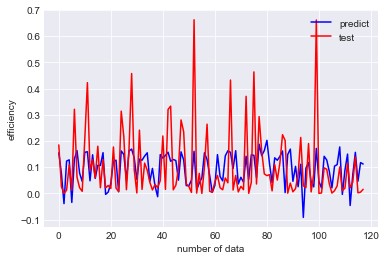

In [97]:
y_pred,y_test=sklearnlinear()
evaluate(y_pred,y_test)

Let us find their correlation coefficient（pearson）


In [98]:
finaldata.corr(method='pearson') 

,WagesAndBenefits,SubsidiesfForIndividualsAndFamilies,FinancialAid,CommodityAndServiceExpenses,OtherCapitalExpenditures,SpecialPublicExpenditure,SpecialProjectExpenditure,BasicConstructionExpenditure,GraduationRate,efficiency
WagesAndBenefits,1.00,0.11,0.11,0.02,-0.16,0.03,-0.19,-0.43,0.13,0.22
SubsidiesfForIndividualsAndFamilies,0.11,1.00,0.33,-0.01,-0.30,0.11,0.02,-0.42,0.30,0.26
FinancialAid,0.11,0.33,1.00,-0.11,-0.26,0.06,0.12,-0.09,0.08,0.10
CommodityAndServiceExpenses,0.02,-0.01,-0.11,1.00,-0.27,0.29,-0.11,-0.47,0.06,0.20
OtherCapitalExpenditures,-0.16,-0.30,-0.26,-0.27,1.00,-0.25,-0.01,0.25,-0.42,-0.29
SpecialPublicExpenditure,0.03,0.11,0.06,0.29,-0.25,1.00,0.00,-0.36,0.31,0.23
SpecialProjectExpenditure,-0.19,0.02,0.12,-0.11,-0.01,0.00,1.00,-0.05,0.02,0.08
BasicConstructionExpenditure,-0.43,-0.42,-0.09,-0.47,0.25,-0.36,-0.05,1.00,-0.30,-0.40
GraduationRate,0.13,0.30,0.08,0.06,-0.42,0.31,0.02,-0.30,1.00,0.61
efficiency,0.22,0.26,0.10,0.20,-0.29,0.23,0.08,-0.40,0.61,1.00


let us drop all the attribute wich correlation coefficient<0.25
if the correlation coefficient is too small means that the correlation between the two attributes is not strong.
They should therefore be removed, and their impact on the model is very low. Remove them to reduce the error.
(why 0.25? because I do tens of experiments to find the best choice)
remove these attributes:
FinancialAid=0.10 
SpecialProjectExpenditure=0.08
CommodityAndServiceExpenses=0.20
wagesandbenefit=0.22 
SpecialPublicExpenditure=0.23

In [99]:
def sklearnlinear():   
    X=finaldata.loc[:,('SubsidiesfForIndividualsAndFamilies',
                       'OtherCapitalExpenditures',
                'BasicConstructionExpenditure')]
    y=finaldata.loc[:,'efficiency']
    X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=100)
    print ('X_train.shape={}\n y_train.shape ={}\n X_test.shape={}\n,  y_test.shape={}'.format(X_train.shape,y_train.shape, X_test.shape,y_test.shape))
    linreg = LinearRegression(fit_intercept=True,normalize=True)
    model=linreg.fit(X_train, y_train)
    print (model)

    print (linreg.intercept_)

    print (linreg.coef_)
     #let us predict
    y_pred = linreg.predict(X_test)
    print (y_pred)
    return y_pred,y_test

X_train.shape=(471, 3)
 y_train.shape =(471,)
 X_test.shape=(118, 3)
,  y_test.shape=(118,)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
0.14655085193144038
[ 0.19122864 -0.05667941 -0.61352627]
[ 1.50375103e-01  8.84068685e-02 -1.38863610e-02  1.12072178e-01
  1.31770874e-01 -2.95736830e-02  1.29350362e-01  1.63688919e-01
  9.42414484e-02  5.85390974e-02  1.53069718e-01  1.54264572e-01
  4.32782324e-02  1.39902612e-01  4.29162051e-02  8.78886675e-02
  1.25450352e-01  1.49497796e-01  1.33070292e-02  1.13706516e-02
  5.53508150e-02  1.35076841e-01  1.12864828e-01 -1.99055403e-02
  1.59932246e-01  1.54657535e-01  3.23902758e-02  1.64714498e-01
  1.61418667e-01  1.28532628e-01  6.16976767e-02  1.19894467e-01
  1.20157409e-01  1.39232815e-01  1.47127613e-01  5.96786270e-02
  7.77212200e-02  3.73398219e-02 -1.34435965e-04  1.43687993e-01
  1.40202246e-01  1.29004305e-01  1.58557344e-01  1.33321926e-01
  1.16287532e-01  1.19504982e-01  4.82393467e-02  1.5896

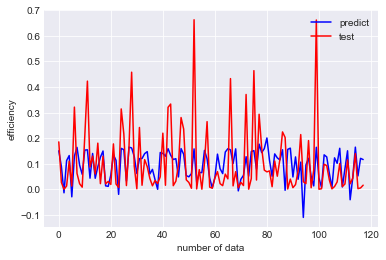

In [100]:
y_pred,y_test=sklearnlinear()
evaluate(y_pred,y_test)

so,we can get the Polynomial：
efficiency=
 0.19122864 * SubsidiesfForIndividualsAndFamilies
-0.05667941 * OtherCapitalExpenditures
-0.61352627 * BasicConstructionExpenditure
+0.14655085193144038

now, we can draw a conclusion:
for the government should increase the investment of 
Subsidies For Individuals And Families, it has a positive influence to efficiency. the government should decrease the investment of Other Capital Expenditures and Basic Construction Expenditure because the increase of them will lead to a decrease in efficiency.


other attributes may not have directly relevant to the efficiency.


With the development of Chinese society, education infrastructure has gradually improved, and investment in education infrastructure may have become less important. Other Capital Expenditures may mean that education investment has not been used for important purposes.
Although educational conditions have improved, students ’tuition fees seem to be becoming more expensive, so increasing individual education subsidies is today ’s top priority.